# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'88896e1e63863eee6e1ef1189e687bde'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

In [4]:
print(cities)




['rikitea', 'souillac', 'shieli', 'lebu', 'pisco', 'belaya gora', 'busselton', 'jamestown', 'egvekinot', 'san cristobal', 'avarua', 'chuy', 'puerto ayora', 'roald', 'upernavik', 'bengkulu', 'castro', 'mataura', 'albany', 'hasaki', 'rio grande', 'barentsburg', 'qaanaaq', 'meulaboh', 'vaini', 'hilo', 'cape town', 'batangafo', 'illoqqortoormiut', 'palmer', 'tymovskoye', 'paita', 'taolanaro', 'bredasdorp', 'port elizabeth', 'impfondo', 'tabiauea', 'thinadhoo', 'price', 'ushuaia', 'zhoucheng', 'payakumbuh', 'moron', 'pevek', 'punta arenas', 'thompson', 'mahebourg', 'banda aceh', 'buala', 'arenapolis', 'omsukchan', 'northam', 'tromso', 'ksenyevka', 'sibolga', 'talnakh', 'bluff', 'karauzyak', 'ugoofaaru', 'tall kayf', 'port alfred', 'fort nelson', 'bambanglipuro', 'aklavik', 'porteirinha', 'mount gambier', 'valdosta', 'san quintin', 'lolua', 'guerrero negro', 'alta floresta', 'yellowknife', 'kapaa', 'barrow', 'miri', 'hihya', 'bambous virieux', 'mehamn', 'saint-augustin', 'itarema', 'khatanga

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#units by default-Kelvin; metric-Celsius; imperial-Fahrenheit, we need Impreial

units = "imperial"


#lists

temp = [] 
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
city_name = []

#counter
city_counter = 0

for city in cities:
    try:
        city_counter += 1
        #print(f"searching for {city}")
        # Build query URL
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city + f"&units={units}"


        # Get weather data
        response = requests.get(f"{query_url}&q={city}").json() 
        print(response)
        
        #append temperature to temp list
        temperature_variable = response["main"]["temp_max"]
        temp.append(temperature_variable)
        
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        city_name.append(response["name"])

        print(f"found city: {city} (number {city_counter})")
        
    except KeyError:
        print("fancy message")
        pass           

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.07, 'feels_like': 79.68, 'temp_min': 77.07, 'temp_max': 77.07, 'pressure': 1016, 'humidity': 84, 'sea_level': 1016, 'grnd_level': 1013}, 'wind': {'speed': 10.63, 'deg': 29}, 'rain': {'1h': 0.74}, 'clouds': {'all': 100}, 'dt': 1589667563, 'sys': {'country': 'PF', 'sunrise': 1589642813, 'sunset': 1589682351}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
found city: rikitea (number 1)
{'coord': {'lon': 57.52, 'lat': -20.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 76.3, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1016, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1589667370, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1589

{'coord': {'lon': -50.01, 'lat': -24.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.03, 'feels_like': 51.06, 'temp_min': 54.03, 'temp_max': 54.03, 'pressure': 1018, 'humidity': 62, 'sea_level': 1018, 'grnd_level': 905}, 'wind': {'speed': 1.79, 'deg': 186}, 'clouds': {'all': 0}, 'dt': 1589667349, 'sys': {'country': 'BR', 'sunrise': 1589622582, 'sunset': 1589661801}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
found city: castro (number 17)
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 45.25, 'feels_like': 41.47, 'temp_min': 45.25, 'temp_max': 45.25, 'pressure': 1029, 'humidity': 73, 'sea_level': 1029, 'grnd_level': 1023}, 'wind': {'speed': 1.83, 'deg': 21}, 'clouds': {'all': 0}, 'dt': 1589667567, 'sys': {'country': 'NZ', 'sunrise': 1589659284, 'sunset': 1589692843}, 

{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 44.06, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1022, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1589667571, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1589691883, 'sunset': 1589729025}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
found city: port elizabeth (number 35)
{'coord': {'lon': 18.07, 'lat': 1.64}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.98, 'feels_like': 80.13, 'temp_min': 73.98, 'temp_max': 73.98, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 974}, 'wind': {'speed': 1.3, 'deg': 121}, 'clouds': {'all': 11}, 'dt': 1589667571, 'sys': {'country': 'CG', 'sunrise': 1589603904, 'sunset':

{'coord': {'lon': 155.8, 'lat': 62.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.64, 'feels_like': 25.14, 'temp_min': 33.64, 'temp_max': 33.64, 'pressure': 1024, 'humidity': 92, 'sea_level': 1024, 'grnd_level': 960}, 'wind': {'speed': 8.63, 'deg': 12}, 'clouds': {'all': 75}, 'dt': 1589667574, 'sys': {'country': 'RU', 'sunrise': 1589646777, 'sunset': 1589711619}, 'timezone': 39600, 'id': 2122493, 'name': 'Omsukchan', 'cod': 200}
found city: omsukchan (number 51)
{'coord': {'lon': -4.22, 'lat': 51.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.63, 'feels_like': 47.66, 'temp_min': 48.99, 'temp_max': 53.01, 'pressure': 1026, 'humidity': 87}, 'wind': {'speed': 4, 'deg': 250, 'gust': 8.99}, 'clouds': {'all': 100}, 'dt': 1589667574, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB', 'sunrise': 1589603104, 'sunset':

{'coord': {'lon': -115.95, 'lat': 30.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.39, 'feels_like': 64.9, 'temp_min': 67.39, 'temp_max': 67.39, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 8.01, 'deg': 288}, 'clouds': {'all': 63}, 'dt': 1589667578, 'sys': {'country': 'MX', 'sunrise': 1589633315, 'sunset': 1589682720}, 'timezone': -25200, 'id': 3984997, 'name': 'San Quintín', 'cod': 200}
found city: san quintin (number 68)
{'cod': '404', 'message': 'city not found'}
fancy message
{'coord': {'lon': -114.06, 'lat': 27.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.08, 'feels_like': 61.83, 'temp_min': 71.08, 'temp_max': 71.08, 'pressure': 1010, 'humidity': 56, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 18.95, 'deg': 322}, 'clouds': {'all': 3}, 'dt': 1589667

{'coord': {'lon': -57.56, 'lat': -38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 70.14, 'feels_like': 68.47, 'temp_min': 66.2, 'temp_max': 73, 'pressure': 1005, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 270}, 'clouds': {'all': 19}, 'dt': 1589667581, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 1589625924, 'sunset': 1589662083}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}
found city: mar del plata (number 84)
{'coord': {'lon': -158.15, 'lat': 21.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.94, 'feels_like': 80.85, 'temp_min': 82.4, 'temp_max': 87.8, 'pressure': 1020, 'humidity': 45}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1589667581, 'sys': {'type': 1, 'id': 7866, 'country': 'US', 'sunrise': 1589644424, 

{'cod': '404', 'message': 'city not found'}
fancy message
{'coord': {'lon': -68.51, 'lat': 63.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 24.96, 'temp_min': 32, 'temp_max': 32, 'pressure': 1021, 'humidity': 95}, 'visibility': 48279, 'wind': {'speed': 5.82, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1589667585, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1589613518, 'sunset': 1589679745}, 'timezone': -14400, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
found city: iqaluit (number 102)
{'coord': {'lon': -73.41, 'lat': 41.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.41, 'feels_like': 68.52, 'temp_min': 71.6, 'temp_max': 73, 'pressure': 1019, 'humidity': 37}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1589667586, 'sys': {'type': 1, 'id': 3888

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#first create a dictionary of the lists to retrieve stored data from
weather_dict = {"City":city_name, "Cloudiness":cloudiness, "Countries":countries, "Temp":temp, "Humidity":humidity, "Wind Speed":wind_speed, "Lat":lat, "Lng":lng}


#now create a data frome from the above formed dictionary
weather_data = pd.DataFrame(weather_dict)

#display count
weather_data.count()



City          94
Cloudiness    94
Countries     94
Temp          94
Humidity      94
Wind Speed    94
Lat           94
Lng           94
dtype: int64

In [7]:
#save to CSV file df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)
#save data frame to CSV
weather_data.to_csv('weather_data.csv', index = False)

# Display data frame head 
weather_data.head(50)

,City,Cloudiness,Countries,Temp,Humidity,Wind Speed,Lat,Lng
0,Rikitea,100,PF,77.07,84,10.63,-23.12,-134.97
1,Souillac,20,MU,71.60,88,3.36,-20.52,57.52
2,Shīeli,91,KZ,69.49,41,8.59,44.17,66.75
3,Lebu,96,CL,57.94,96,6.49,-37.62,-73.65
4,Pisco,4,PE,68.00,77,9.17,-13.70,-76.22
5,Belaya Gora,9,RU,37.02,79,7.87,68.53,146.42
6,Busselton,100,AU,51.01,56,6.51,-33.65,115.33
7,Jamestown,1,US,66.99,45,5.82,42.10,-79.24
8,Egvekinot,11,RU,28.24,96,14.36,66.32,-179.17
9,San Cristobal,20,VE,93.20,34,20.80,7.77,-72.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

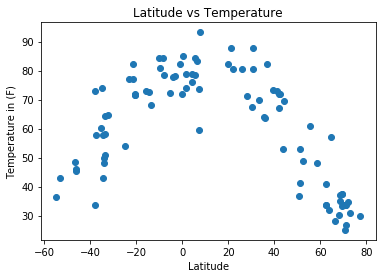

In [18]:
#graph a scatter plot after extracting data from weather_data dataframe
plt.scatter(weather_data['Lat'], weather_data['Temp'])

plt.title("Latitude vs Temperature")

plt.xlabel("Latitude")

plt.ylabel("Temperature in (F)")


#save plotted figures as .pngs
plt.savefig("temperature_vs_latitude.png")

plt.show()

## Latitude vs. Humidity Plot

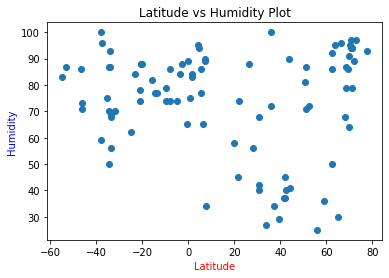

In [19]:
#same format as previous
plt.scatter(weather_data['Lat'], weather_data['Humidity'])
                         
plt.title("Latitude vs Humidity Plot")

plt.xlabel("Latitude", color="red")

plt.ylabel("Humidity", color="blue")

plt.savefig("Humidity_vs_Latitude.png")


## Latitude vs. Cloudiness Plot

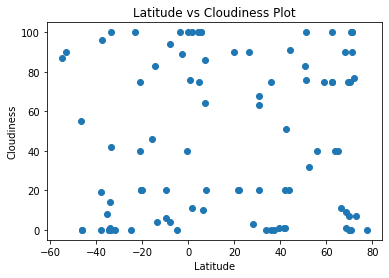

In [20]:
#same format as previous
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'])
                         
plt.title("Latitude vs Cloudiness Plot")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.savefig("Cloudiness_vs_Latitude.png")

## Latitude vs. Wind Speed Plot

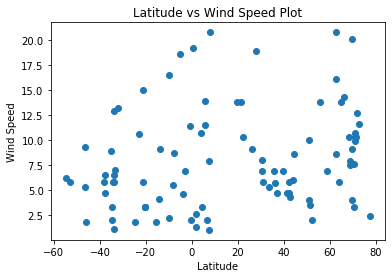

In [22]:
#same format as previous
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'])
                         
plt.title("Latitude vs Wind Speed Plot")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.savefig("Wind_Speed_vs_Latitude.png")